- 匯入 pandas 套件以進行資料處理  
- 指定 Netflix 流失資料集的檔案路徑  
- 將 CSV 檔讀取為 DataFrame 供後續分析使用  

In [18]:
import pandas as pd
input_data_file = "/Users/chengxianghuang/Downloads/netflix_customer_churn.csv"
netflix = pd.read_csv(input_data_file)

- 先以長條圖呈現 churned 的類別分布，再分別對數值型與類別型特徵繪製單變量分布以進行完整的資料稽核  


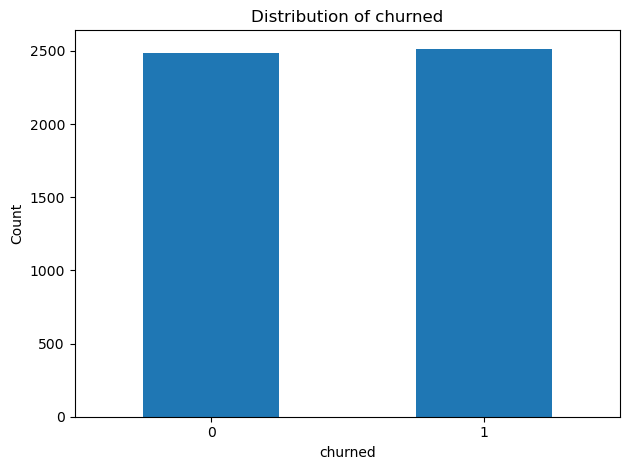

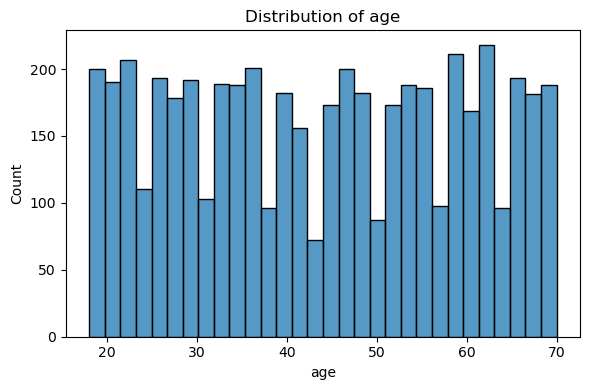

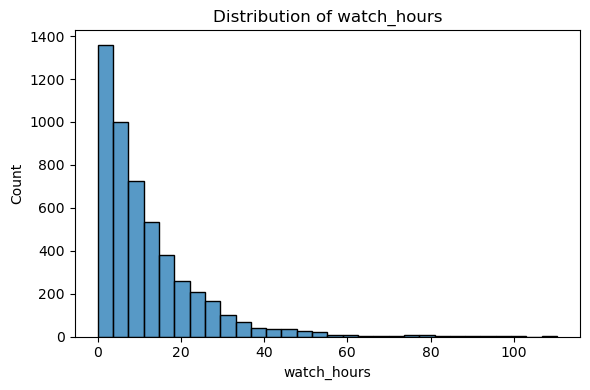

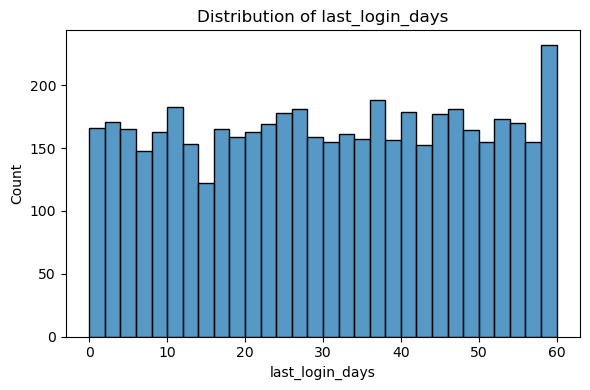

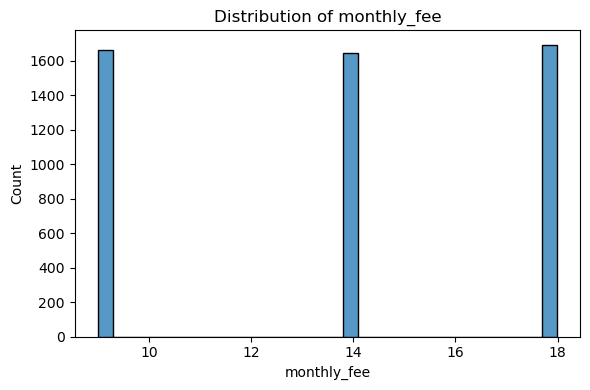

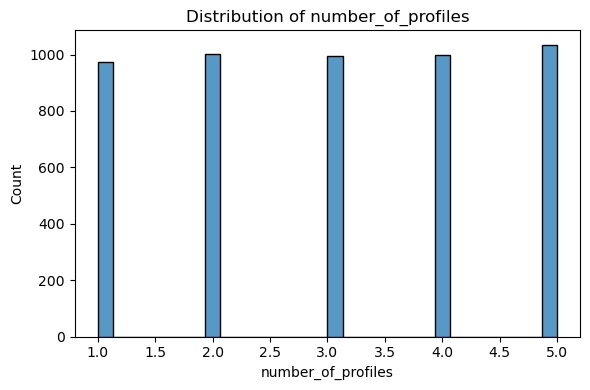

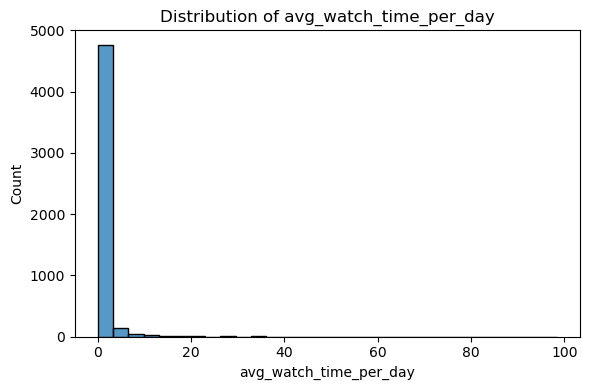

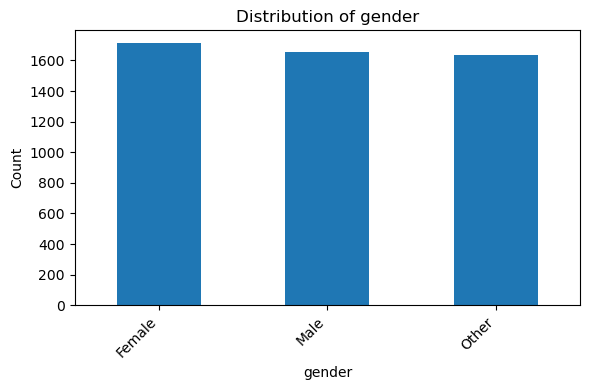

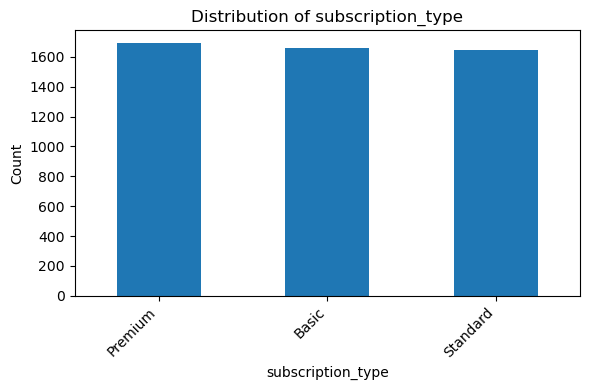

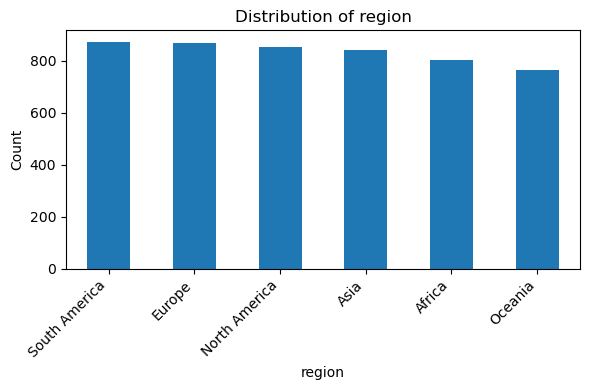

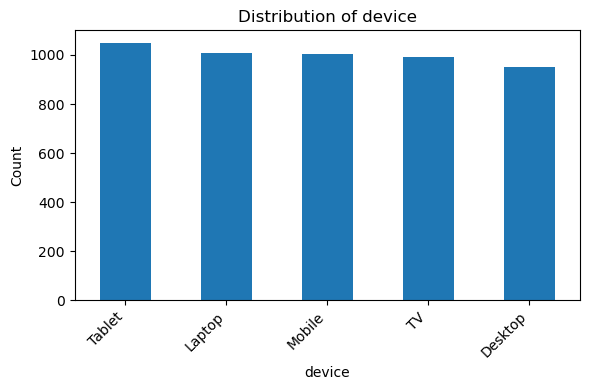

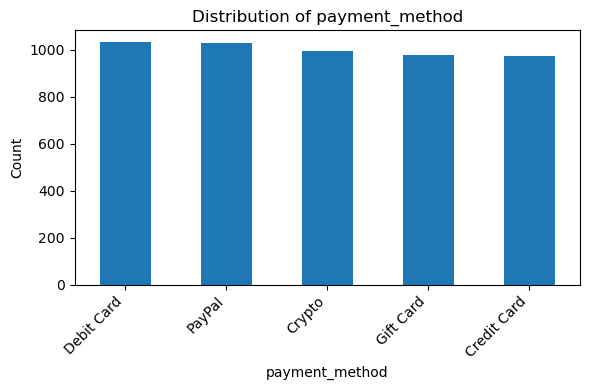

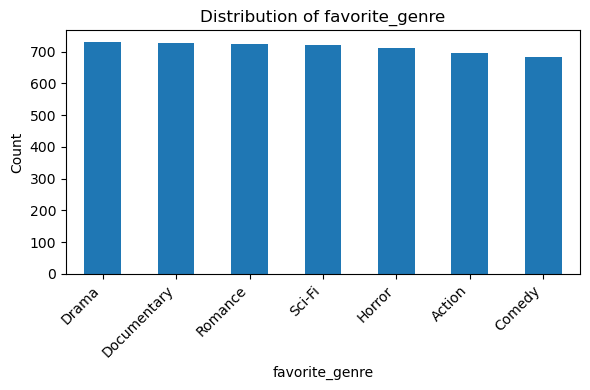

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# 複製資料，避免動到原始 dataframe
df = netflix.copy()

# 排除 customer_id
if "customer_id" in df.columns:
    df = df.drop(columns=["customer_id"])

# 特別指定 target
target = "churned"

# 分離數值型與類別型（不含 target）
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.drop(target)
categorical_cols = df.select_dtypes(include=["object", "category"]).columns

# ========== 1️⃣ 先畫 target（正確用 bar）==========
df[target].value_counts().sort_index().plot(kind="bar")
plt.title("Distribution of churned")
plt.xlabel("churned")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# ========== 數值型欄位 ==========
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

# ========== 類別型欄位 ==========
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    df[col].value_counts().plot(kind="bar")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


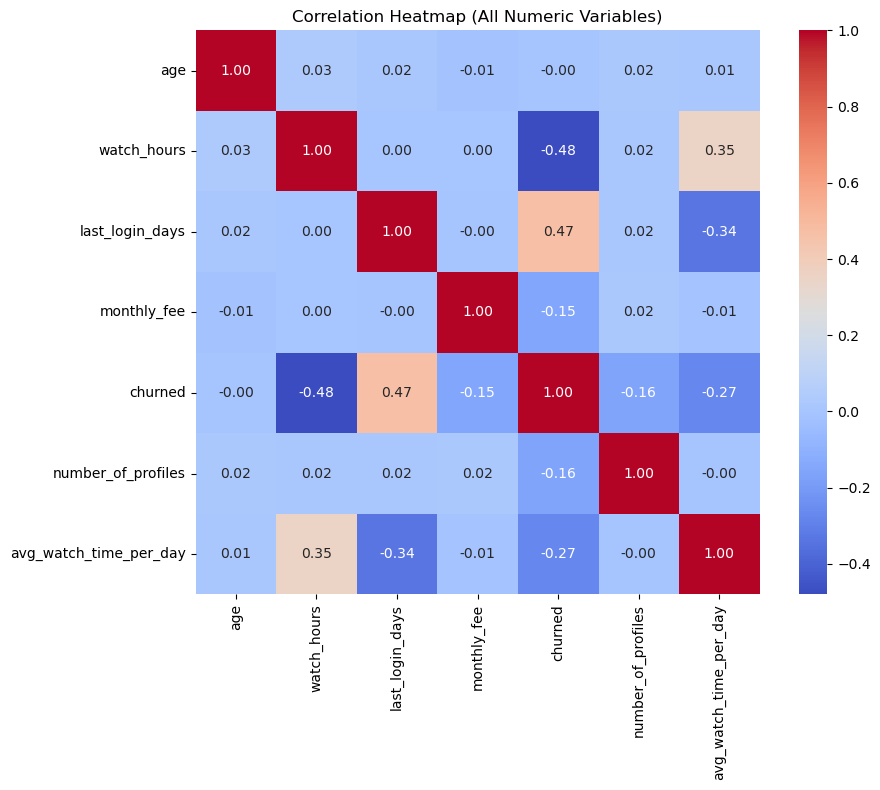

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# 複製資料
df = netflix.copy()

# 排除 customer_id
if "customer_id" in df.columns:
    df = df.drop(columns=["customer_id"])

# 只取數值型變數（含 churned）
numeric_df = df.select_dtypes(include=["int64", "float64"])

# 計算相關係數矩陣
corr = numeric_df.corr()

# 畫 heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap (All Numeric Variables)")
plt.tight_layout()
plt.show()


- 類別型變數以「各類別平均流失率」呈現，用於比較不同族群的流失風險差異  
- 連續型變數採等頻分箱後計算每一區間的流失率，以觀察流失風險隨數值變化的行為模式  
- 整體分析皆以 churned 為核心，排除 customer_id，確保結果具可解釋性與建模實用性  


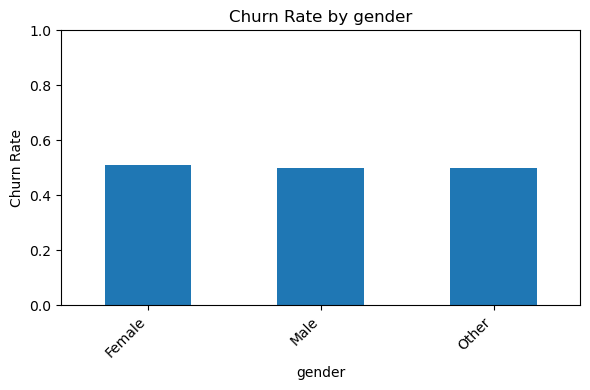

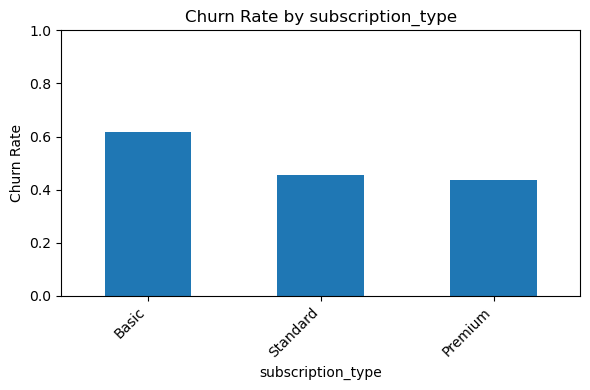

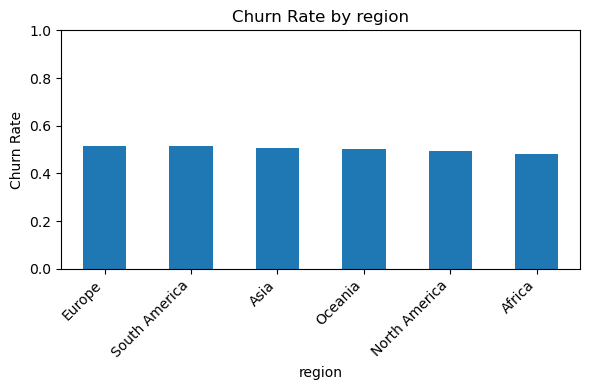

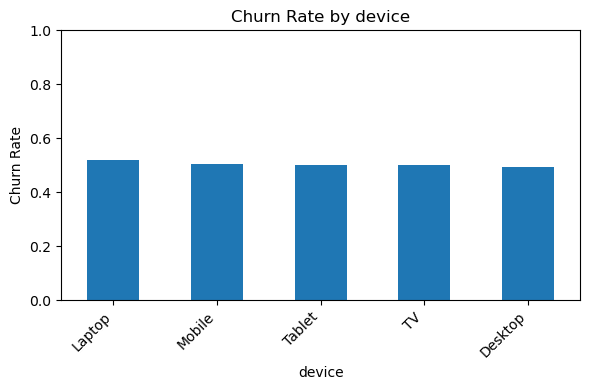

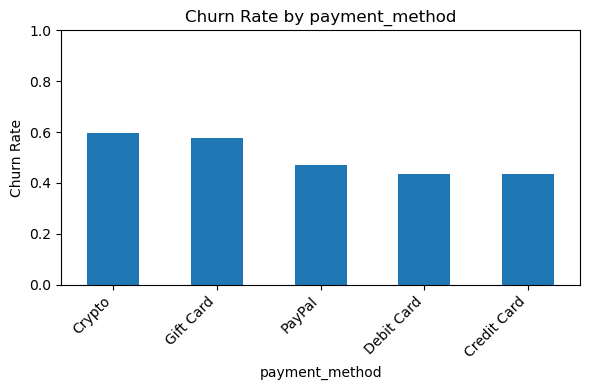

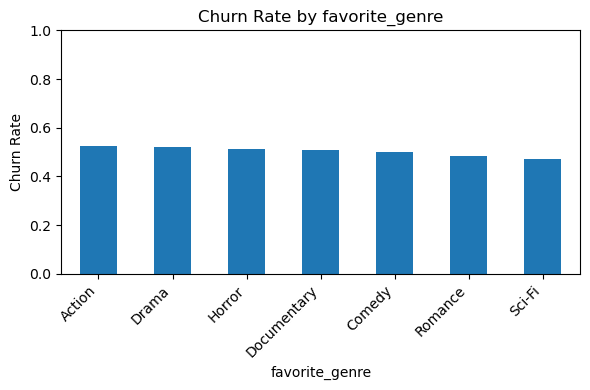

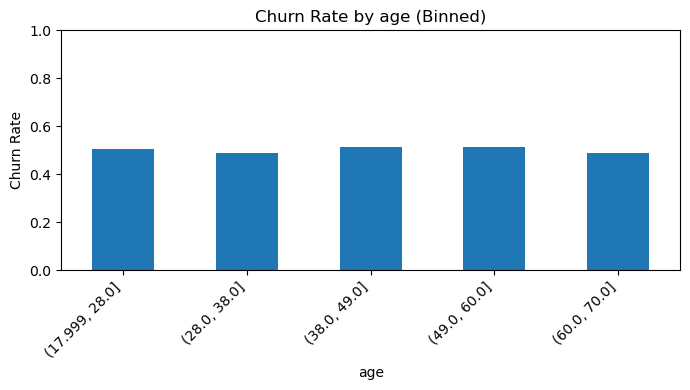

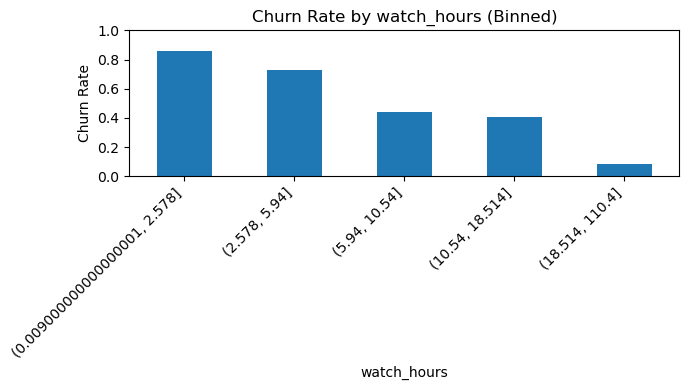

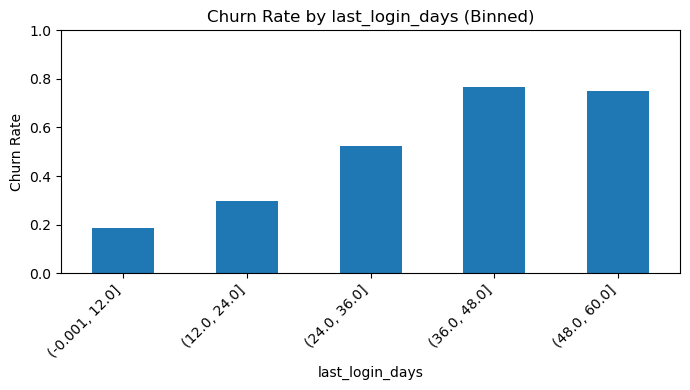

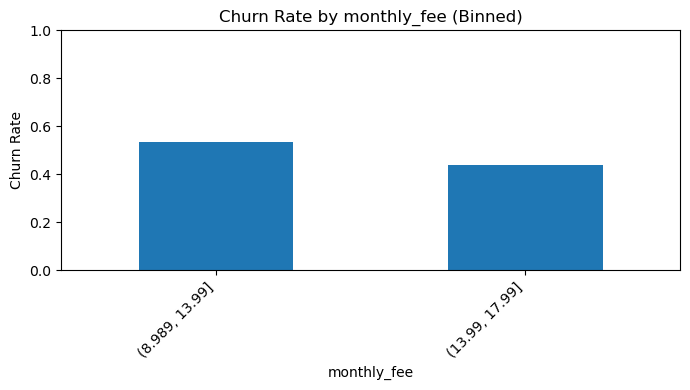

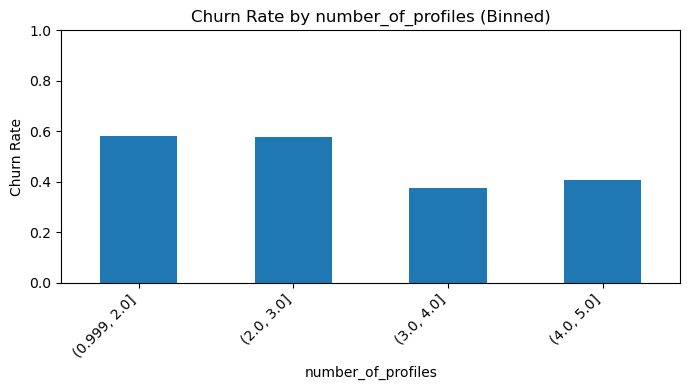

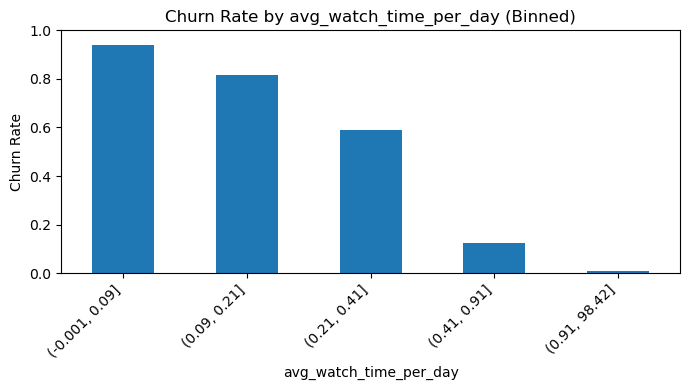

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# 複製資料
df = netflix.copy()

# 排除 customer_id
if "customer_id" in df.columns:
    df = df.drop(columns=["customer_id"])

target = "churned"

# 分類變數型態
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.drop(target)
categorical_cols = df.select_dtypes(include=["object", "category"]).columns

# ==========  類別型變數：每一類別的流失率 ==========
for col in categorical_cols:
    churn_rate = (
        df.groupby(col)[target]
        .mean()
        .sort_values(ascending=False)
    )

    plt.figure(figsize=(6, 4))
    churn_rate.plot(kind="bar")
    plt.title(f"Churn Rate by {col}")
    plt.xlabel(col)
    plt.ylabel("Churn Rate")
    plt.ylim(0, 1)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

# ==========  連續型變數：分箱後的流失率 ==========
N_BINS = 5  

for col in numeric_cols:
    # 等頻分箱
    df["bin"] = pd.qcut(df[col], q=N_BINS, duplicates="drop")

    churn_rate = (
    df.groupby("bin", observed=False)[target]
      .mean()
)


    plt.figure(figsize=(7, 4))
    churn_rate.plot(kind="bar")
    plt.title(f"Churn Rate by {col} (Binned)")
    plt.xlabel(col)
    plt.ylabel("Churn Rate")
    plt.ylim(0, 1)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

    # 清除暫存欄位
    df.drop(columns=["bin"], inplace=True)

